In [1]:
# basic
import numpy as np
import pandas as pd
import seaborn as sns
import random
import time
from math import inf
from datetime import timedelta

In [2]:
# Machine Learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

In [3]:
# Visualization               
import matplotlib.pyplot as plt

In [4]:
# Load Data and check out the data
path = '/Users/mizugakun/GW/GW_Work/2022 Spring/CSCI 6364/Final project/data/Concrete_Data.xls'
df = pd.read_excel(path)
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
# rename the colunms
mapper={'Cement (component 1)(kg in a m^3 mixture)':'cement',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag',
        'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
        'Water  (component 4)(kg in a m^3 mixture)':'water',
        'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate',
        'Age (day)':'age','Concrete compressive strength(MPa, megapascals) ':'concrete_strength'}

df.rename(columns=mapper, inplace=True)
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
features_name = np.array(df.columns)[:8,]
data_m = np.array(df)
X = data_m[:,:8]
y = data_m[:,8]
print("X data shape: ", X.shape)
print("y data shape: ", y.shape)

X data shape:  (1030, 8)
y data shape:  (1030,)


In [7]:
# Model training dataset & split the data
sc = StandardScaler()
norm = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(norm, y, test_size=0.25, random_state=33)

In [8]:
# Training linear regression model
start_time = time.time()
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [9]:
# Calculate the error by MSE
mean_squared_error(y_test, y_pred)

109.6384098906192

In [10]:
# calculate the r2
r2_score(y_test, y_pred)

0.6219015455071368

In [11]:
random_state = 33
kf = KFold(n_splits = 5, shuffle = True, random_state = random_state)

for train_index, test_index in kf.split(norm):
    X_train, X_test = norm[train_index], norm[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(r2_score(y_test, y_pred))

0.6295477919215546
0.6403149526054464
0.5889278341965163
0.5652373209092771
0.5894661384758525


In [12]:
# use RandomForestRegressor
start_time = time.time()
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [13]:
# Calculate the error by MSE
mean_squared_error(y_test, y_pred)

20.72841626999984

In [14]:
# calculate the r2
r2_score(y_test, y_pred)

0.9145767170502344

In [15]:
# Cross Validation on Random Forest Regression
random_state = 33
kf = KFold(n_splits = 5, shuffle = True, random_state = random_state)

for train_index, test_index in kf.split(norm):
    X_train, X_test = norm[train_index], norm[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(r2_score(y_test, y_pred))

0.9270958695519123
0.9142664772585027
0.8912877224007087
0.8976727259881019
0.9082965759943029


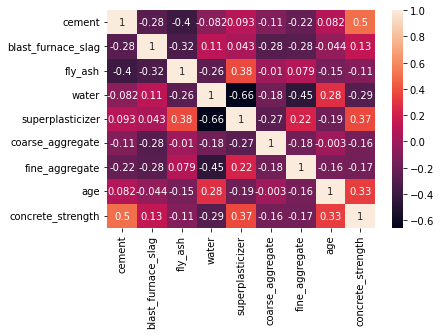

In [16]:
# finding correlation between features and target value
sns.heatmap(df .corr(), annot= True)
plt.show()

In [17]:
df.corr().iloc[:,[8,]].sort_values(by=['concrete_strength'], ascending=False)

,concrete_strength
concrete_strength,1.000000
cement,0.497833
superplasticizer,0.366102
age,0.328877
blast_furnace_slag,0.134824
fly_ash,-0.105753
coarse_aggregate,-0.164928
fine_aggregate,-0.167249
water,-0.289613


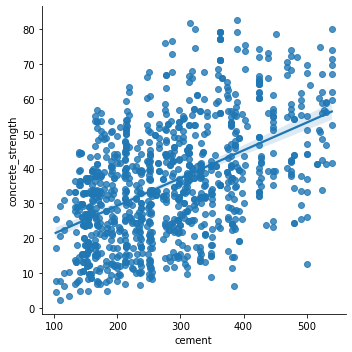

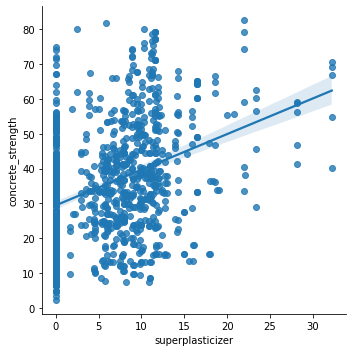

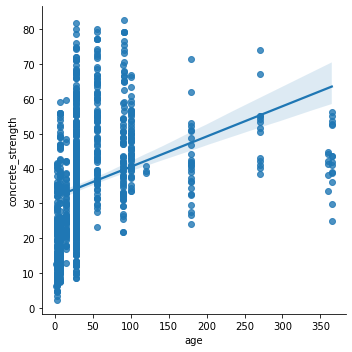

In [18]:
### The Cement,Superplasticizer, and Age are the indicators
sns.lmplot(data = df , x ='cement' , y='concrete_strength')
sns.lmplot(data = df , x ='superplasticizer' , y='concrete_strength')
sns.lmplot(data = df , x ='age' , y='concrete_strength')

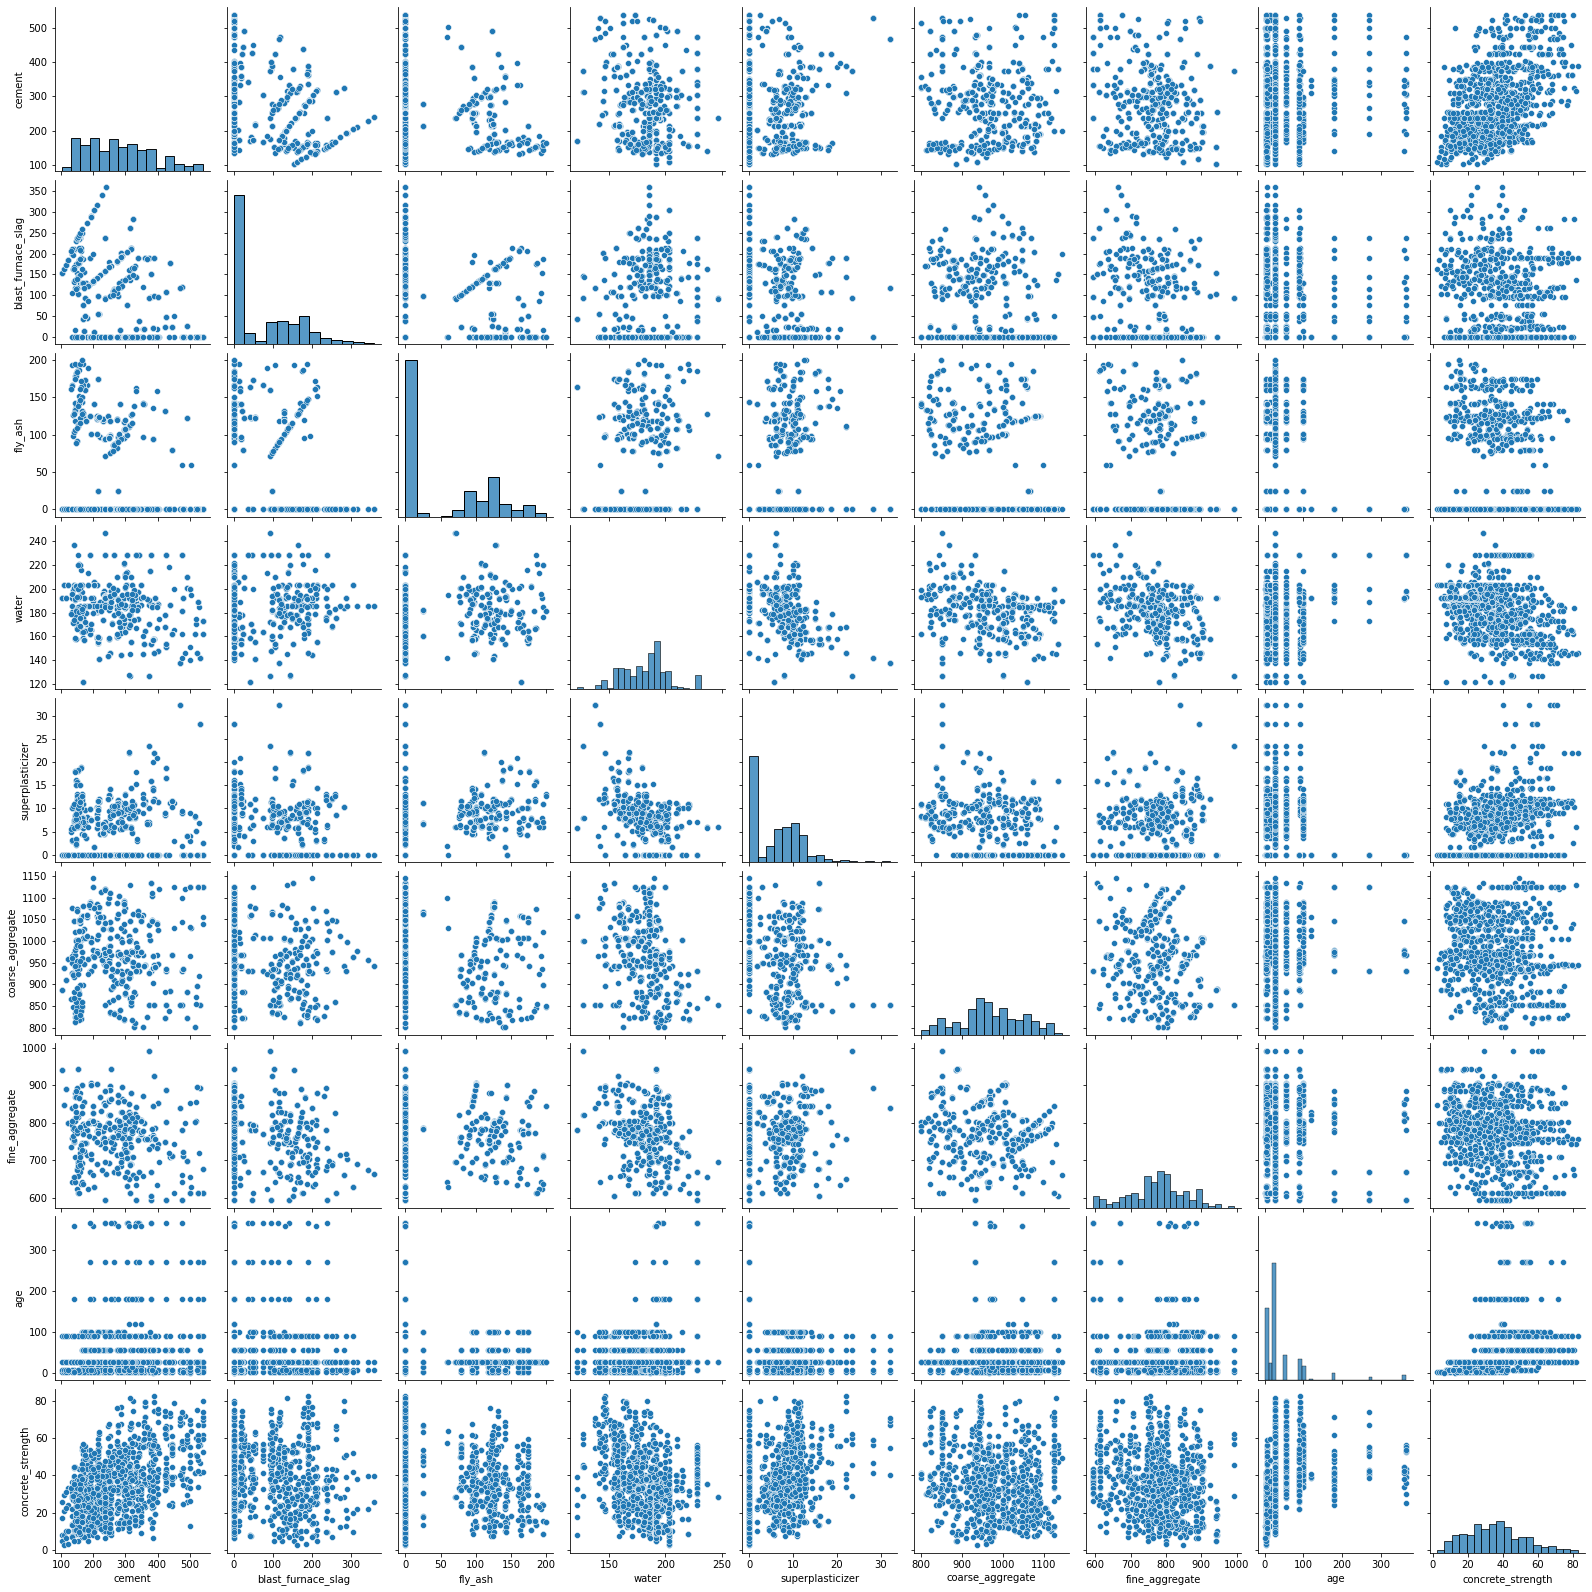

In [19]:
sns.pairplot(df)